# Experimental design

_Alex I. Malz (LINCC@CMU)_

_LSSTC DSFP #16_

I initially started a version of this problem set based on a data challenge I prepared for [Quarks to Cosmos with AI](https://events.mcs.cmu.edu/qtc2021/), which provides all the pieces you need to run an interesting experiment with photo-$z$ posterior PDF estimation models by a variety of metrics.
However, that seems overly specific for the DSFP -- the goal is for you to learn to think adversarially in your own research, not in mine! -- so this one is more generalizable.

## Objective

The goal of this problem set is for you to learn to identify and circumvent flaws in an experiment.
To us as astronomers, an experiment may constitute the way we compare analysis methods or models or the impact of systematic imperfections in data or priors.
The way we decide whether a procedure we came up with is sufficient for a task or better than some alternative is conditioned on our choice of metric.

## Problem 1

Here are four sets of two-dimensional data.
You can imagine that they're the predictions of four models for estimating the relationship between variables $x$ and $y$ if you like (e.g. galaxy cluster concentration as a function of dark matter halo mass), or four observations that may or may not have come from a common process (e.g. folded time-series of variable stars).
In this problem, you don't know the true values and can't conduct a controlled experiment, so we'll try to compare them using summary statistics we might actually apply to comparing the results of several estimation methods.

In [1]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

### 1a

The simplest summary statistic is the first moment, a.k.a. the mean, $\mu_{z} = \frac{1}{N}\sum_{i=1}^{N}z_{n}$.
Write a function to compute the mean of a one-dimensional list.
_Hint: Use `scipy.stats.moment()` if you want a shortcut._
Compute the mean of $x$ and the mean of $y$ for each data set.
Interpret the results.

In [2]:
import statistics as sts

print(f"mean x1: {round(sts.mean(x1),3)} | mean y1: {round(sts.mean(y1),3)}")
print(f"mean x2: {round(sts.mean(x2),3)} | mean y2: {round(sts.mean(y2),3)}")
print(f"mean x3: {round(sts.mean(x3),3)} | mean y3: {round(sts.mean(y3),3)}")
print(f"mean x4: {round(sts.mean(x4),3)} | mean y4: {round(sts.mean(y4),3)}")

mean x1: 9 | mean y1: 7.501
mean x2: 9 | mean y2: 7.501
mean x3: 9 | mean y3: 7.5
mean x4: 9 | mean y4: 7.501


### 1b

The next simplest summary statistic is the second moment, a.k.a. the variance, $\sigma_{z}^{2} = \frac{1}{N-1}\sum_{i=1}^{N}(z_{n} - \mu_{z})^{2}$.
Write a function to compute the variance of a one-dimensional list.
_Hint: Use `scipy.stats.moment()` if you want a shortcut._
Compute the variance of $x$ and the variance of $y$ for each data set.
Interpret the results.

In [3]:
print(f"variance x1: {round(sts.variance(x1),3)} | variance y1: {round(sts.variance(y1),3)}")
print(f"variance x2: {round(sts.variance(x2),3)} | variance y2: {round(sts.variance(y2),3)}")
print(f"variance x3: {round(sts.variance(x3),3)} | variance y3: {round(sts.variance(y3),3)}")
print(f"variance x4: {round(sts.variance(x4),3)} | variance y4: {round(sts.variance(y4),3)}")

variance x1: 11 | variance y1: 4.127
variance x2: 11 | variance y2: 4.128
variance x3: 11 | variance y3: 4.123
variance x4: 11 | variance y4: 4.123


### 1c

Judging by the first two moments, we need something a little more sophisticated to quantitatively distinguish these data sets.
Let's make use of both $x$ and $y$ together.
Pearson's correlation coefficient $r = \frac{\sum_{i=1}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})}{\sqrt{\sum_{i=1}^{N}(x_{i}-\mu_{x})^{2}\sum_{i=1}^{N}(y_{i}-\mu_{y})^{2}}}$ is a measure of the degree to which variables $x$ and $y$ are correlated with one another.
Write a function to compute the correlation coefficient of a two-dimensional data set.
_Hint: Use `scipy.stats.pearsonr()` if you want a shortcut._
Compute the $r$ for each data set.
Interpret the results.

In [4]:
from scipy import stats

print(f"correlation I (x1/y1): {stats.pearsonr(x1, y1)}")
print(f"correlation II (x2/y2): {stats.pearsonr(x2, y2)}")
print(f"correlation III (x3/y3): {stats.pearsonr(x3, y3)}")
print(f"correlation IV (x4/y4): {stats.pearsonr(x4, y4)}")

correlation I (x1/y1): PearsonRResult(statistic=0.81642051634484, pvalue=0.0021696288730787875)
correlation II (x2/y2): PearsonRResult(statistic=0.8162365060002427, pvalue=0.0021788162369108027)
correlation III (x3/y3): PearsonRResult(statistic=0.8162867394895982, pvalue=0.002176305279228025)
correlation IV (x4/y4): PearsonRResult(statistic=0.8165214368885029, pvalue=0.002164602347197218)


### 1d

They sure do seem to all be the same, yet the numbers in the lists are different!
Let's try fitting a simple model to them.
Recycle your code from earlier in the week to fit a line to data and apply it to these four data sets.
_If you didn't get that far in a notebook, you can use `scipy.stats.linregress`._
Interpret the resulting slope and intercept values _(and coefficient of determination, p-value, and standard error, if you used the canned fitting function._

In [5]:
from scipy import stats

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1, y1)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(x3, y3)
slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(x4, y4)

print(f"I - Equation: {round(slope1,2)}x + {round(intercept1,2)}, R squared: {round(r_value1,2)}, P value: {round(p_value1,2)}, Std error: {round(std_err1,2)}")
print(f"II - Equation: {round(slope2,2)}x + {round(intercept2,2)}, R squared: {round(r_value2,2)}, P value: {round(p_value2,2)}, Std error: {round(std_err2,2)}")
print(f"III - Equation: {round(slope3,2)}x + {round(intercept3,2)}, R squared: {round(r_value3,2)}, P value: {round(p_value3,2)}, Std error: {round(std_err3,2)}")
print(f"IV - Equation: {round(slope4,2)}x + {round(intercept4,2)}, R squared: {round(r_value4,2)}, P value: {round(p_value4,2)}, Std error: {round(std_err4,2)}")

I - Equation: 0.5x + 3.0, R squared: 0.82, P value: 0.0, Std error: 0.12
II - Equation: 0.5x + 3.0, R squared: 0.82, P value: 0.0, Std error: 0.12
III - Equation: 0.5x + 3.0, R squared: 0.82, P value: 0.0, Std error: 0.12
IV - Equation: 0.5x + 3.0, R squared: 0.82, P value: 0.0, Std error: 0.12


### 1e

Finally, plot the four data sets, along with the line.
Interpret the results.

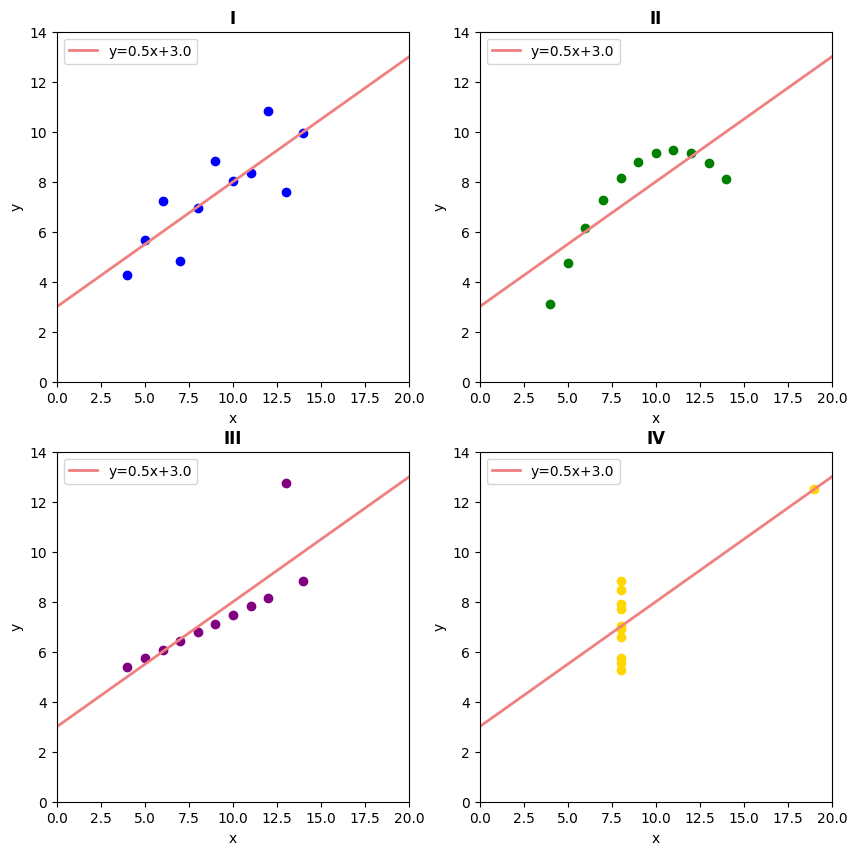

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
p1, p0 = np.polyfit(x1, y1, deg=1)  # Linear regression for I

x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
p3, p2 = np.polyfit(x2, y2, deg=1)  # Linear regression for II

x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
p5, p4 = np.polyfit(x3, y3, deg=1)  # Linear regression for III

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]
p7, p6 = np.polyfit(x4, y4, deg=1)  # Linear regression for IV

# Create the figure and the axes
fig, axs = plt.subplots(2, 2)

# First scatter plot I
axs[0, 0].scatter(x1, y1, c = 'blue')
axs[0, 0].set_title("I", loc='center',fontweight='bold')
axs[0, 0].axline(xy1=(0, p0), slope=p1, lw=2,color='lightcoral',label=f'y={round(p1,2)}x+{round(p0,2)}')
axs[0, 0].legend()
axs[0, 0].set_ylim(0,14)
axs[0, 0].set_xlim(0,20)

# Second scatter plot II
axs[0, 1].scatter(x2, y2, c = 'green')
axs[0, 1].set_title("II", loc='center',fontweight='bold')
axs[0, 1].axline(xy1=(0, p2), slope=p3, lw=2,color='lightcoral',label=f'y={round(p3,2)}x+{round(p2,2)}')
axs[0, 1].legend()
axs[0, 1].set_ylim(0,14)
axs[0, 1].set_xlim(0,20)

# Third scatter plot III
axs[1, 0].scatter(x3, y3, c = 'purple')
axs[1, 0].set_title("III", loc='center',fontweight='bold')
axs[1, 0].axline(xy1=(0, p4), slope=p5, lw=2,color='lightcoral',label=f'y={round(p5,2)}x+{round(p4,2)}')
axs[1, 0].legend()
axs[1, 0].set_ylim(0,14)
axs[1, 0].set_xlim(0,20)

# Fourth scatter plot IV
axs[1, 1].scatter(x4, y4, c = '#FFD700')
axs[1, 1].set_title("IV", loc='center',fontweight='bold')
axs[1, 1].axline(xy1=(0, p6), slope=p7, lw=2,color='lightcoral',label=f'y={round(p7,2)}x+{round(p6,2)}')
axs[1, 1].legend()
axs[1, 1].set_ylim(0,14)
axs[1, 1].set_xlim(0,20)

# Add the x and y labels
for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

# Define the size of the figure
fig.set_figheight(10)
fig.set_figwidth(10)

### 1f

If you had to distinguish these data sets quantitatively, what metric(s) would you use?
Implement at least one and show that the data sets don't have the same value(s) by your metric(s).
Or, show that other metrics you can think of also can't distinguish them.

_Hint: Start by thinking of a way to distinguish just one from the others._
_As a challenge problem, then come up with another set of $(x, y)$ that will be degenerate by another metric._

Highlight for spoiler and credit.

<font color='white'>
By the way, Problem 1 is known as Anscombe's quartet and was devised to show statisticians the value of visual inspection over total reliance on quantitative metrics.
The solutions can be found in [this nifty blog post](https://datasciencesphere.com/visualization/visualizing-anscombe-quartet-using-python/).
</font>

## Problem 2

Let's try a more complicated version of this.
Download some other data sets [here](https://www.autodesk.com/content/dam/autodesk/www/autodesk-reasearch/Publications/pdf/SameStatsCode.zip).
Let's inspect them first.

In [8]:
import pandas as pd

data = pd.read_csv('generated_datasets/DatasaurusDozen.tsv', sep='\t')
print(data.columns)

print(len(data['dataset'].unique()))

Index(['dataset', 'x', 'y'], dtype='object')
13


### 2a

We can separate them out and calculate some summary statistics:
- How many points are in each?
- What is the mean?
- Variance?
- Standard deviation?
- Correlation coefficient?
- Covariance $\sum_{i=1}^{N}(x_{i}-\mu_{x})(y_{i}-\mu_{y})$?

In [9]:
datasets_grouped = data.groupby('dataset')
print(datasets_grouped.agg(['count', 'mean', 'var', 'std']))
print(data.groupby('dataset')[['x','y']].corr().iloc[0::2,-1])
print(data.groupby('dataset').cov())

               x                                       y             \
           count       mean         var        std count       mean   
dataset                                                               
away         142  54.266100  281.227029  16.769825   142  47.834721   
bullseye     142  54.268730  281.207393  16.769239   142  47.830823   
circle       142  54.267320  280.898024  16.760013   142  47.837717   
dino         142  54.263273  281.069988  16.765142   142  47.832253   
dots         142  54.260303  281.156953  16.767735   142  47.839829   
h_lines      142  54.261442  281.095333  16.765898   142  47.830252   
high_lines   142  54.268805  281.122364  16.766704   142  47.835450   
slant_down   142  54.267849  281.124206  16.766759   142  47.835896   
slant_up     142  54.265882  281.194420  16.768853   142  47.831496   
star         142  54.267341  281.197993  16.768959   142  47.839545   
v_lines      142  54.269927  281.231512  16.769959   142  47.836988   
wide_l

### 2b

Let's try fitting a line again to check the slopes and intercepts.

In [10]:
from scipy import stats

lr_datasets = datasets_grouped.apply(lambda x: stats.linregress(data['x'], data['y']))

slopes = []
intercepts = []
rvalues = []

for i in range(0,13):
    index_dataset = lr_datasets.index[i]
    slopes.append(lr_datasets[index_dataset].slope)
    intercepts.append(lr_datasets[index_dataset].intercept)
    rvalues.append(lr_datasets[index_dataset].rvalue)

df_lr_datasets = pd.DataFrame(data=list(zip(slopes, intercepts, rvalues)), columns=['Slopes', 'Intercepts', 'R values'])
df_lr_datasets = df_lr_datasets.set_index(lr_datasets.index)

df_lr_datasets

,Slopes,Intercepts,R values
dataset,,,
away,-0.106053,53.590127,-0.066019
bullseye,-0.106053,53.590127,-0.066019
circle,-0.106053,53.590127,-0.066019
dino,-0.106053,53.590127,-0.066019
dots,-0.106053,53.590127,-0.066019
h_lines,-0.106053,53.590127,-0.066019
high_lines,-0.106053,53.590127,-0.066019
slant_down,-0.106053,53.590127,-0.066019
slant_up,-0.106053,53.590127,-0.066019


### 2c

Now try plotting them, including the line.

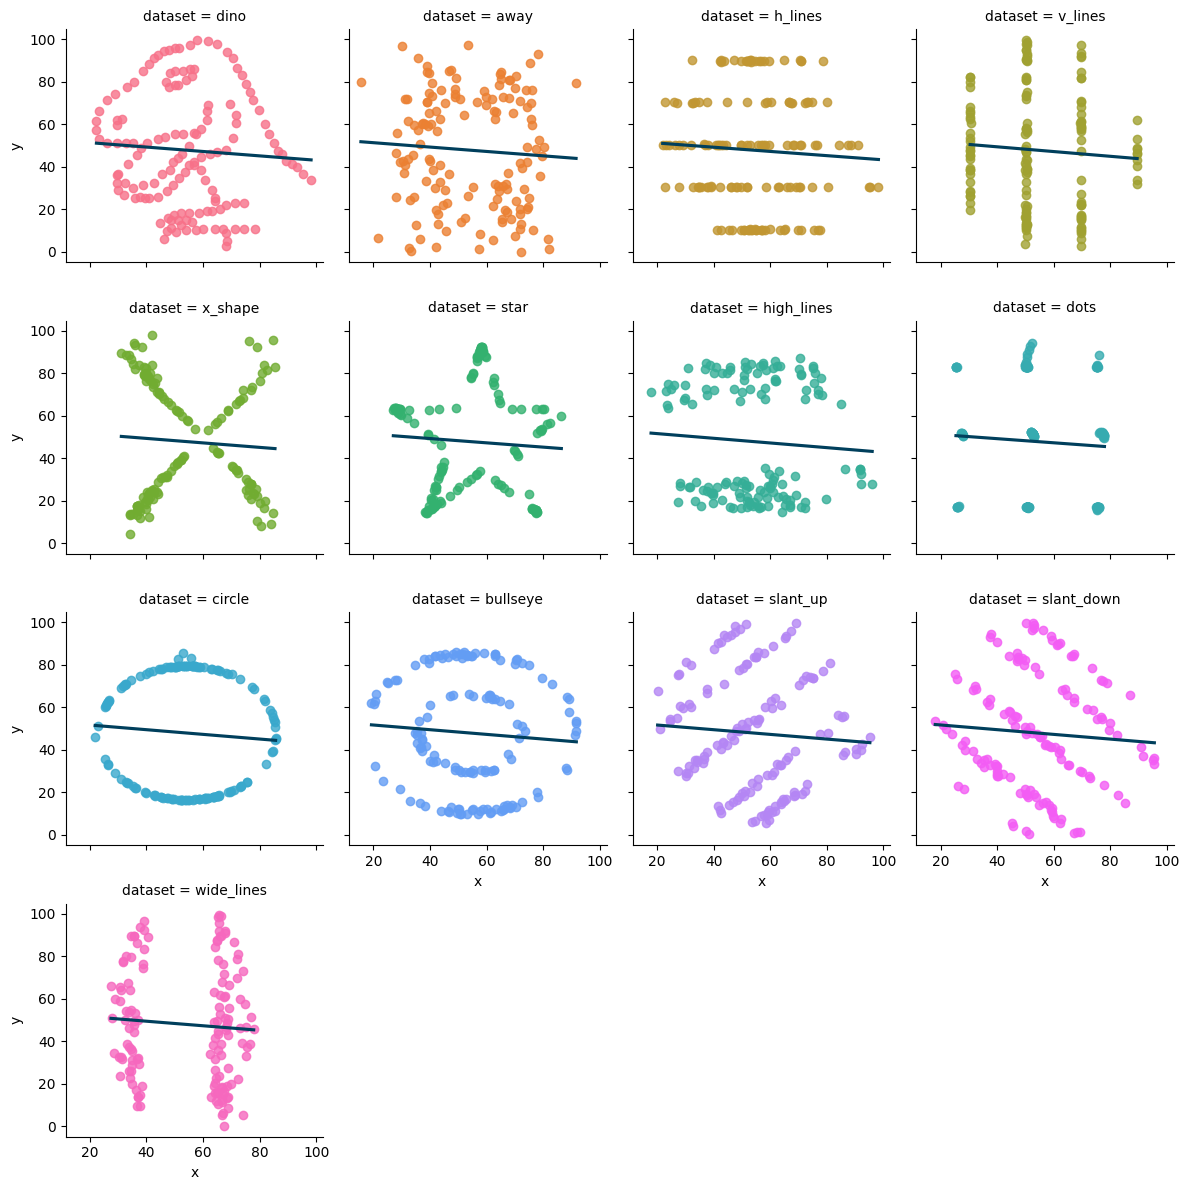

In [12]:
import seaborn as sns

# grid_scatterplots = sns.FacetGrid(data, col="dataset", hue="dataset", col_wrap=4)
# grid_scatterplots.map_dataframe(sns.scatterplot, x="x", y="y")
sns.lmplot(data=data, x="x", y="y", col="dataset", hue="dataset", line_kws={'color': '#003f5c'}, col_wrap=4, ci=None, height=3)

### 2d

Again, implement a metric that can distinguish between them, and then try to think of another data set that will be indistinguishable from one of the data sets by that metric.

Highlight for spoiler and credit.

<font color='white'>
Problem 2 uses the Datasaurus Dozen, a modern reenvisioning of Anscombe's quartet.
The solutions can be found in [yet another nifty blog post](https://datasciencesphere.com/visualization/datasaurus-dozen-visualization-using-python/).
</font>

## Problem 3

Now that you've seen how metrics can be fooled by pathological data, I want you to apply this kind of critical thinking to your research!
Talk with your neighbors to take apart a problem you (or they) are working on that involves comparing methods, models, or data.

### 3a

Articulate the metric(s) being used to make a decision.

### 3b

Think of a pathological control case that would lead to a counterintuitive conclusion using the given metric(s).

### 3c

Think about additional metrics that could protect your decision from being "fooled" by a test case that doesn't address the goal.

## Problem $\pi$

If you don't want to do the open-ended thought experiment about a research problem you or another student is working on, check out the other notebook for this problem session to explore a specific one (surprise, it's photo-$z$s).